# BLOB (BINARY LARGE OBJECT)
****

A "blob" is a term often used to refer to a region of an image that differs in properties, such as brightness,color or size, compared to surrounding regions. Essentially, a blob is a group of connected pixels that share some common characteristic or computed property.<p>

The class implements a simple algorithm for extracting blobs from an image:

1. Convert the source image to binary images by applying thresholding with several thresholds from minThreshold (inclusive) to maxThreshold (exclusive) with distance thresholdStep between neighboring thresholds.

2. Extract connected components from every binary image by findContours and calculate their centers.

3. Group centers from several binary images by their coordinates. Close centers form one group that corresponds to one blob, which is controlled by the minDistBetweenBlobs parameter.

4. From the groups, estimate final centers of blobs and their radiuses and return as locations and sizes of keypoints.

This class performs several filtrations of returned blobs. You should set filterBy* to true/false to turn on/off corresponding filtration. 
<b>Available filtrations:</b>

1. By color. This filter compares the intensity of a binary image at the center of a blob to blobColor. If they differ, the blob is filtered out. Use blobColor = 0 to extract dark blobs and blobColor = 255 to extract light blobs.

2. By area. Extracted blobs have an area between minArea (inclusive) and maxArea (exclusive).

3. By circularity. Extracted blobs have circularity ( 4∗π∗Areaperimeter∗perimeter) between minCircularity (inclusive) and maxCircularity (exclusive).

4. By ratio of the minimum inertia to maximum inertia. Extracted blobs have this ratio between minInertiaRatio (inclusive) and maxInertiaRatio (exclusive).

5. By convexity. Extracted blobs have convexity (area / area of blob convex hull) between minConvexity (inclusive) and maxConvexity (exclusive).

![Blob](../Graphics/blob.png)


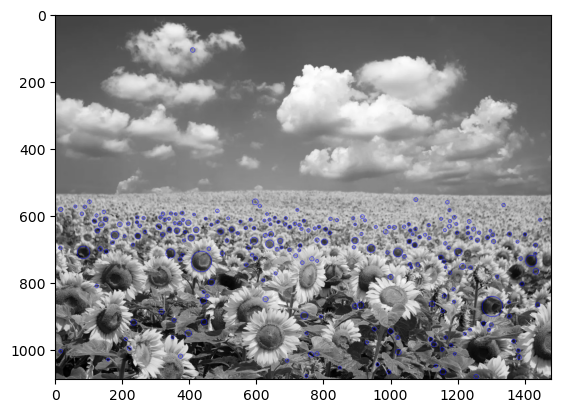

In [6]:
import cv2
import matplotlib.pyplot as plt

# Read image
image = cv2.imread("../Graphics/Input.png", cv2.IMREAD_GRAYSCALE)

# Setup SimpleBlobDetector parameters
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10
params.maxThreshold = 200

# Filter by Area
params.filterByArea = True
params.minArea = 50

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01


detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs as red circles
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of the blob
im_with_keypoints = cv2.drawKeypoints(image, keypoints, None, (0, 0, 255),
                                       cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(im_with_keypoints)
